In [62]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_csv("../../output/output.csv", delimiter=";")

In [64]:
df.head()

,MAPPING,FUNCTION,OBJ,WIDTH,REPEATS,RMAX,GEOM_OFF?,TESS_OFF?,ALPHA,X,Y,Z,EXPECTED_RESULT,ACTUAL_RESULT,GRAPHICS_FPS,COMPUTE_FPS,Unnamed: 16
0,SPHERICAL,spherical_area,octahedron.1.0.0.0.0.0.0.obj,2048,1000,10000,0,0,3.141593,0,0,0,12.566371,0.00000,6006.01,2774.41,NaN
1,SPHERICAL,spherical_area,wide_triangle.obj,2048,1000,10000,0,0,3.141593,0,0,0,1.569383,1.04894,5829.58,2908.41,NaN
2,SPHERICAL,spherical_area,octahedron.1.0.0.0.0.0.0.obj,1024,1000,10000,0,0,3.141593,0,0,0,12.566371,0.00000,21371.60,7866.71,NaN
3,SPHERICAL,spherical_area,wide_triangle.obj,1024,1000,10000,0,0,3.141593,0,0,0,1.569383,1.04801,20954.70,7836.74,NaN
4,SPHERICAL,spherical_area,octahedron.1.0.0.0.0.0.0.obj,512,1000,10000,0,0,3.141593,0,0,0,12.566371,0.00000,59740.70,22127.30,NaN


In [65]:
df["ERROR"] = abs(df["EXPECTED_RESULT"] - df["ACTUAL_RESULT"])/df["EXPECTED_RESULT"]

In [66]:
dfo = df[df["OBJ"] == "octahedron.1.0.0.0.0.0.0.obj"]
dft = df[df["OBJ"] == "wide_triangle.obj"]

# Ratios - Triangle

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


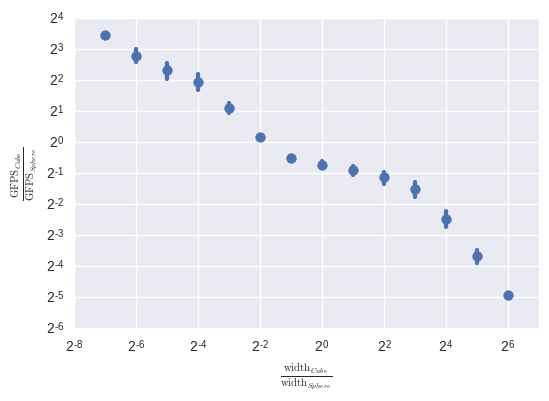

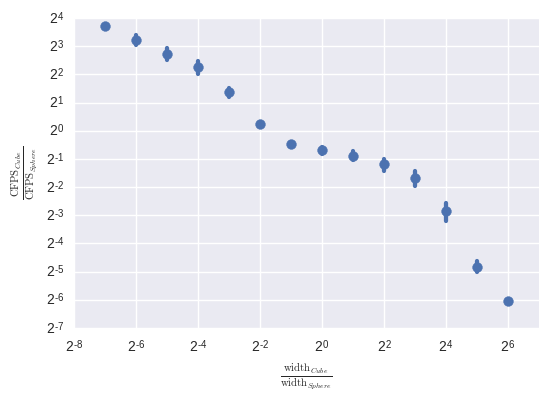

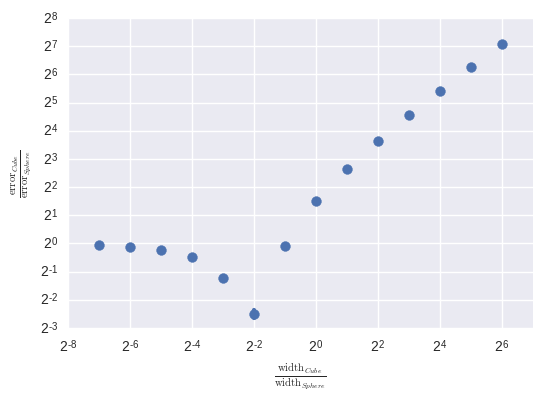

In [67]:
df_fps = dft
df_fps = df_fps[df_fps["FUNCTION"] == "spherical_area"]
df_fps = df_fps[df_fps["GEOM_OFF?"] != 1]
df_fps = df_fps[df_fps["TESS_OFF?"] != 1]

df_fps_cube = df_fps[df_fps["MAPPING"] == "CUBE"]
df_fps_cube.columns = [c+".C" for c in df_fps_cube.columns]
df_fps_spherical = df_fps[df_fps["MAPPING"] == "SPHERICAL"]
df_fps_spherical.columns = [c+".S" for c in df_fps_spherical.columns]

df_fps_cube["key"] = 0
df_fps_spherical["key"] = 0
df_fps_both = pd.merge(df_fps_spherical, df_fps_cube, on ="key")

reldiff = lambda a,b: abs((a-b)/a)
df_fps_both["W"] = df_fps_both["WIDTH.C"]/df_fps_both["WIDTH.S"]
df_fps_both["E"] = reldiff(df_fps_both["ERROR.C"],df_fps_both["ERROR.S"])
df_fps_both["GFPS"] = df_fps_both["GRAPHICS_FPS.C"]/df_fps_both["GRAPHICS_FPS.S"]
df_fps_both["CFPS"] = df_fps_both["COMPUTE_FPS.C"]/df_fps_both["COMPUTE_FPS.S"]

f = plt.figure()
ax = f.gca()
ax.set_xscale('log', basex=2)
ax.set_yscale('log', basey=2)
ax = sns.regplot(x="W",
            y="GFPS",
            ax=ax,
            data=df_fps_both,
            x_estimator=np.mean,
            fit_reg=False,
            ci=95
        )
ax.set(xlabel=r"$\frac{\mathrm{width}_{Cube}}{\mathrm{width}_{Sphere}}$")
ax.set(ylabel=r"$\frac{\mathrm{GFPS}_{Cube}}{\mathrm{GFPS}_{Sphere}}$")
f.savefig("plots/gfps_ratio_triangle.png")

f = plt.figure()
ax = f.gca()
ax.set_xscale('log', basex=2)
ax.set_yscale('log', basey=2)
ax = sns.regplot(x="W",
            y="CFPS",
            ax=ax,
            data=df_fps_both,
            x_estimator=np.mean,
            fit_reg=False,
            ci=95
        )
ax.set(xlabel=r"$\frac{\mathrm{width}_{Cube}}{\mathrm{width}_{Sphere}}$")
ax.set(ylabel=r"$\frac{\mathrm{CFPS}_{Cube}}{\mathrm{CFPS}_{Sphere}}$")
f.savefig("plots/cfps_ratio_triangle.png")

f = plt.figure()
ax = f.gca()
ax.set_xscale('log', basex=2)
ax.set_yscale('log', basey=2)
ax = sns.regplot(x="W",y="E",ax=ax,data=df_fps_both[df_fps_both["ALPHA.S"] < 0.11],x_estimator=np.mean,fit_reg=False, ci=95)
ax.set(xlabel=r"$\frac{\mathrm{width}_{Cube}}{\mathrm{width}_{Sphere}}$")
ax.set(ylabel=r"$\frac{\mathrm{error}_{Cube}}{\mathrm{error}_{Sphere}}$")
f.savefig("plots/error_ratio_triangle.png")

# Ratios - Octahedron

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


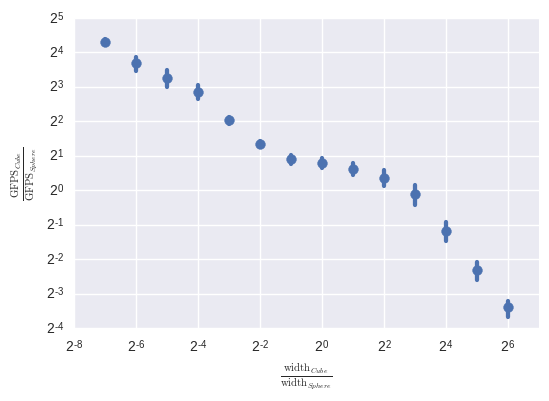

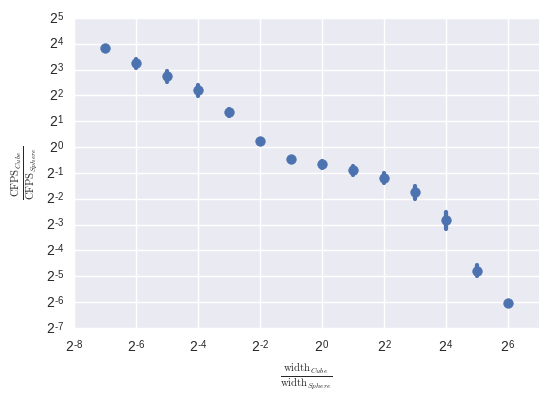

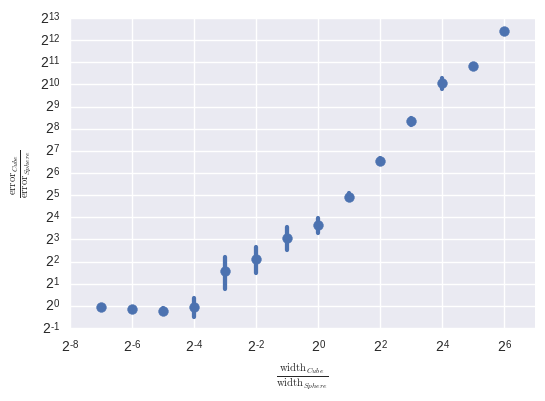

In [73]:
df_fps = dfo
df_fps = df_fps[df_fps["FUNCTION"] == "spherical_area"]
df_fps = df_fps[df_fps["GEOM_OFF?"] != 1]
df_fps = df_fps[df_fps["TESS_OFF?"] != 1]

df_fps_cube = df_fps[df_fps["MAPPING"] == "CUBE"]
df_fps_cube.columns = [c+".C" for c in df_fps_cube.columns]
df_fps_spherical = df_fps[df_fps["MAPPING"] == "SPHERICAL"]
df_fps_spherical.columns = [c+".S" for c in df_fps_spherical.columns]

df_fps_cube["key"] = 0
df_fps_spherical["key"] = 0
df_fps_both = pd.merge(df_fps_spherical, df_fps_cube, on ="key")

reldiff = lambda a,b: abs((a-b)/a)
df_fps_both["W"] = df_fps_both["WIDTH.C"]/df_fps_both["WIDTH.S"]
df_fps_both["E"] = reldiff(df_fps_both["ERROR.C"],df_fps_both["ERROR.S"])
df_fps_both["GFPS"] = df_fps_both["GRAPHICS_FPS.C"]/df_fps_both["GRAPHICS_FPS.S"]
df_fps_both["CFPS"] = df_fps_both["COMPUTE_FPS.C"]/df_fps_both["COMPUTE_FPS.S"]

f = plt.figure()
ax = f.gca()
ax.set_xscale('log', basex=2)
ax.set_yscale('log', basey=2)
ax = sns.regplot(x="W",
            y="GFPS",
            ax=ax,
            data=df_fps_both,
            x_estimator=np.mean,
            fit_reg=False,
            ci=95
        )
ax.set(xlabel=r"$\frac{\mathrm{width}_{Cube}}{\mathrm{width}_{Sphere}}$")
ax.set(ylabel=r"$\frac{\mathrm{GFPS}_{Cube}}{\mathrm{GFPS}_{Sphere}}$")
f.savefig("plots/gfps_ratio_octahedron.png")

f = plt.figure()
ax = f.gca()
ax.set_xscale('log', basex=2)
ax.set_yscale('log', basey=2)
ax = sns.regplot(x="W",
            y="CFPS",
            ax=ax,
            data=df_fps_both,
            x_estimator=np.mean,
            fit_reg=False,
            ci=95
        )
ax.set(xlabel=r"$\frac{\mathrm{width}_{Cube}}{\mathrm{width}_{Sphere}}$")
ax.set(ylabel=r"$\frac{\mathrm{CFPS}_{Cube}}{\mathrm{CFPS}_{Sphere}}$")
f.savefig("plots/cfps_ratio_octahedron.png")

f = plt.figure()
ax = f.gca()
ax.set_xscale('log', basex=2)
ax.set_yscale('log', basey=2)
ax = sns.regplot(x="W",y="E",ax=ax,data=df_fps_both[df_fps_both["ALPHA.S"] < 0.11],x_estimator=np.mean,fit_reg=False, ci=95)
ax.set(xlabel=r"$\frac{\mathrm{width}_{Cube}}{\mathrm{width}_{Sphere}}$")
ax.set(ylabel=r"$\frac{\mathrm{error}_{Cube}}{\mathrm{error}_{Sphere}}$")
f.savefig("plots/error_ratio_octahedron.png")

# Absolute error - Octahedron

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


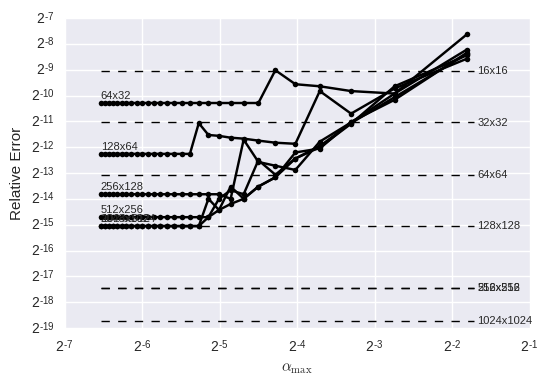

In [69]:
df2 = dfo
df2["DIFF"] = np.abs(df["ACTUAL_RESULT"] - df["EXPECTED_RESULT"])
df2 = df2[df2["MAPPING"] == "SPHERICAL"]
df2 = df2[df2["FUNCTION"] == "spherical_area"]
df2 = df2[df2["GEOM_OFF?"] == 0]
df2 = df2[df2["TESS_OFF?"] == 0]
f = plt.figure()
ax = f.gca()

df3 = dfo
df3["DIFF"] = np.abs(df3["ACTUAL_RESULT"] - df3["EXPECTED_RESULT"])
df3 = df3[df3["MAPPING"] == "CUBE"]
df3 = df3[df3["FUNCTION"] == "spherical_area"]
for row in df3.iterrows():
    ax.plot([min(df2["ALPHA"]), np.pi/10-0.01], [row[1]["ERROR"], row[1]["ERROR"]], color="black", linewidth=1,linestyle="dashed")
    ax.text(np.pi/10, row[1]["ERROR"], "{0}x{1}".format(row[1]["WIDTH"],row[1]["WIDTH"]), fontsize=8, va='center')

ax.set_xscale('log', basex=2)
ax.set_yscale('log', basey=2)
for width in df2["WIDTH"].unique():
    if width <= 32:
        continue
    df3 = df2[df2["WIDTH"] == width]
    df3 = df3[df3["ALPHA"] <= np.pi/10]
    ax.plot(df3["ALPHA"].values, df3["ERROR"].values, color="black", marker="o", markersize=4)
    
    rmin = df3["ALPHA"].argmin()
    mx = df3.loc[rmin]["ALPHA"]
    my = df3.loc[rmin]["ERROR"]
    ax.text(mx, my+2.0**((np.log2(my)-3)), "{0}x{1}".format(width, width/2), fontsize=8)

ax.set_ylabel("Relative Error")
ax.set_xlabel(r"$\alpha_\mathrm{max}$")
f.savefig("plots/error_octahedron.png")



# Error - Octahedron

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


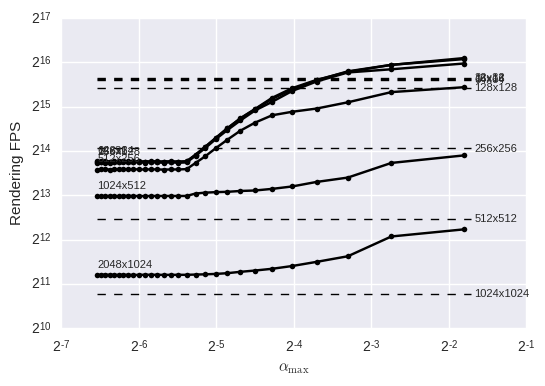

In [70]:
df2 = dfo
df2["DIFF"] = np.abs(df["ACTUAL_RESULT"] - df["EXPECTED_RESULT"])
df2 = df2[df2["MAPPING"] == "SPHERICAL"]
df2 = df2[df2["FUNCTION"] == "spherical_area"]
df2 = df2[df2["GEOM_OFF?"] == 0]
df2 = df2[df2["TESS_OFF?"] == 0]
f = plt.figure()
ax = f.gca()

df3 = dfo
df3["DIFF"] = np.abs(df3["ACTUAL_RESULT"] - df3["EXPECTED_RESULT"])
df3 = df3[df3["MAPPING"] == "CUBE"]
df3 = df3[df3["FUNCTION"] == "spherical_area"]
for row in df3.iterrows():
    ax.plot([min(df2["ALPHA"]), np.pi/10-0.01], [row[1]["GRAPHICS_FPS"], row[1]["GRAPHICS_FPS"]], color="black", linewidth=1,linestyle="dashed")
    ax.text(np.pi/10, row[1]["GRAPHICS_FPS"], "{0}x{1}".format(row[1]["WIDTH"],row[1]["WIDTH"]), fontsize=8, va='center')

ax.set_xscale('log', basex=2)
ax.set_yscale('log', basey=2)
for width in df2["WIDTH"].unique():
    if width <= 32:
        continue
    df3 = df2[df2["WIDTH"] == width]
    df3 = df3[df3["ALPHA"] <= np.pi/10]
    ax.plot(df3["ALPHA"].values, df3["GRAPHICS_FPS"].values, color="black", marker="o", markersize=4)
    
    rmin = df3["ALPHA"].argmin()
    mx = df3.loc[rmin]["ALPHA"]
    my = df3.loc[rmin]["GRAPHICS_FPS"]
    ax.text(mx, my+2.0**((np.log2(my)-3)), "{0}x{1}".format(width, width/2), fontsize=8)

ax.set_ylabel("Rendering FPS")
ax.set_xlabel(r"$\alpha_\mathrm{max}$")
f.savefig("plots/fps_octahedron.png")

# Error Triangle

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


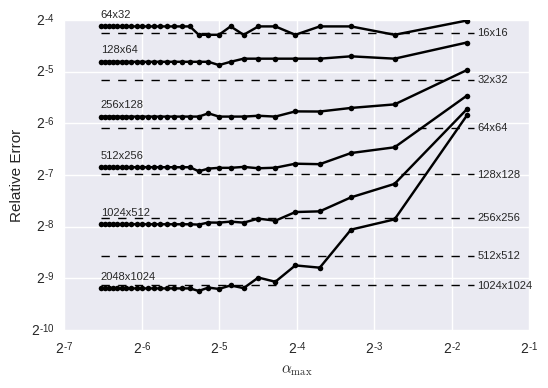

In [71]:
df2 = dft
df2["DIFF"] = np.abs(df["ACTUAL_RESULT"] - df["EXPECTED_RESULT"])
df2 = df2[df2["MAPPING"] == "SPHERICAL"]
df2 = df2[df2["FUNCTION"] == "spherical_area"]
df2 = df2[df2["GEOM_OFF?"] == 0]
df2 = df2[df2["TESS_OFF?"] == 0]
f = plt.figure()
ax = f.gca()

df3 = dft
df3["DIFF"] = np.abs(df3["ACTUAL_RESULT"] - df3["EXPECTED_RESULT"])
df3 = df3[df3["MAPPING"] == "CUBE"]
df3 = df3[df3["FUNCTION"] == "spherical_area"]
for row in df3.iterrows():
    ax.plot([min(df2["ALPHA"]), np.pi/10-0.01], [row[1]["ERROR"], row[1]["ERROR"]], color="black", linewidth=1,linestyle="dashed")
    ax.text(np.pi/10, row[1]["ERROR"], "{0}x{1}".format(row[1]["WIDTH"],row[1]["WIDTH"]), fontsize=8, va='center')

ax.set_xscale('log', basex=2)
ax.set_yscale('log', basey=2)
for width in df2["WIDTH"].unique():
    if width <= 32:
        continue
    df3 = df2[df2["WIDTH"] == width]
    df3 = df3[df3["ALPHA"] <= np.pi/10]
    ax.plot(df3["ALPHA"].values, df3["ERROR"].values, color="black", marker="o", markersize=4)
    
    rmin = df3["ALPHA"].argmin()
    mx = df3.loc[rmin]["ALPHA"]
    my = df3.loc[rmin]["ERROR"]
    ax.text(mx, my+2.0**((np.log2(my)-3)), "{0}x{1}".format(width, width/2), fontsize=8)

ax.set_ylabel("Relative Error")
ax.set_xlabel(r"$\alpha_\mathrm{max}$")
f.savefig("plots/error_triangle.png")



# FPS - Triangle

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


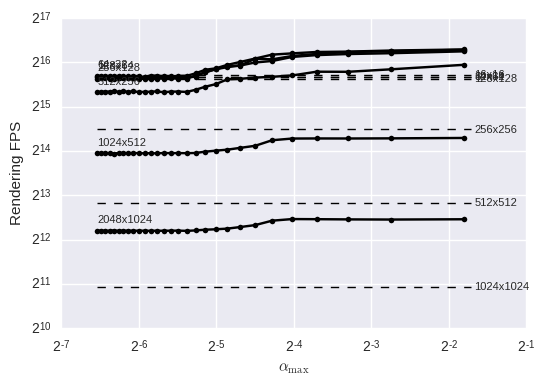

In [72]:
df2 = dft
df2["DIFF"] = np.abs(df["ACTUAL_RESULT"] - df["EXPECTED_RESULT"])
df2 = df2[df2["MAPPING"] == "SPHERICAL"]
df2 = df2[df2["FUNCTION"] == "spherical_area"]
df2 = df2[df2["GEOM_OFF?"] == 0]
df2 = df2[df2["TESS_OFF?"] == 0]
f = plt.figure()
ax = f.gca()

df3 = dft
df3["DIFF"] = np.abs(df3["ACTUAL_RESULT"] - df3["EXPECTED_RESULT"])
df3 = df3[df3["MAPPING"] == "CUBE"]
df3 = df3[df3["FUNCTION"] == "spherical_area"]
for row in df3.iterrows():
    ax.plot([min(df2["ALPHA"]), np.pi/10-0.01], [row[1]["GRAPHICS_FPS"], row[1]["GRAPHICS_FPS"]], color="black", linewidth=1,linestyle="dashed")
    ax.text(np.pi/10, row[1]["GRAPHICS_FPS"], "{0}x{1}".format(row[1]["WIDTH"],row[1]["WIDTH"]), fontsize=8, va='center')

ax.set_xscale('log', basex=2)
ax.set_yscale('log', basey=2)
for width in df2["WIDTH"].unique():
    if width <= 32:
        continue
    df3 = df2[df2["WIDTH"] == width]
    df3 = df3[df3["ALPHA"] <= np.pi/10]
    ax.plot(df3["ALPHA"].values, df3["GRAPHICS_FPS"].values, color="black", marker="o", markersize=4)
    
    rmin = df3["ALPHA"].argmin()
    mx = df3.loc[rmin]["ALPHA"]
    my = df3.loc[rmin]["GRAPHICS_FPS"]
    ax.text(mx, my+2.0**((np.log2(my)-3)), "{0}x{1}".format(width, width/2), fontsize=8)

ax.set_ylabel("Rendering FPS")
ax.set_xlabel(r"$\alpha_\mathrm{max}$")
f.savefig("plots/fps_triangle.png")